# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
# #Ans 1)
# For this assignment, I selected the publicly available Twitter US Airline Sentiment dataset.
# This real-world dataset contains tweets directed at major U.S. airlines and includes sentiment labels
# classified as positive, neutral, or negative. The dataset was obtained from Kaggle and includes over 14,000 tweets.

# Each entry in the dataset consists of:
# -->The tweet text (text column)
# -->A sentiment label (airline_sentiment) indicating whether the tweet is positive, negative, or neutral
# -->Additional metadata such as the airline name, timestamp, tweet ID, and confidence scores

# The dataset is well-suited for sentiment analysis because it reflects genuine customer opinions,
# making it ideal for training and evaluating machine learning models.

In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')  # Also download for lemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Ans 2)
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import re


# Load the dataset
df = pd.read_csv('Tweets 2.csv')

# Display first few rows
df.head()


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [ ]:
# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()



text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                          clean_text  
0                                               said  
1       plus youve added commercial experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing

<ipython-input-6-9a5876ad9719>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='Set2')


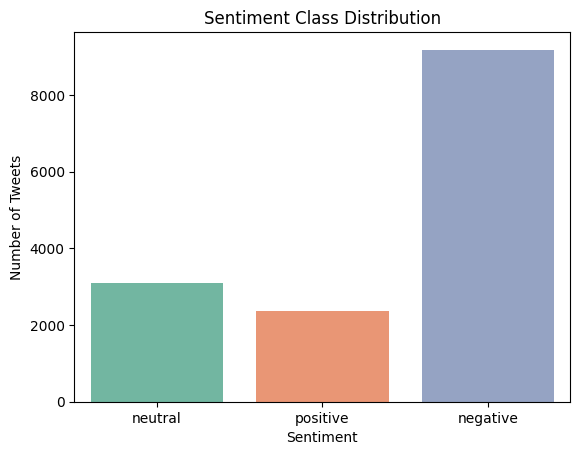

In [ ]:
# Plot class distribution
sns.countplot(x='airline_sentiment', data=df, palette='Set2')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show();


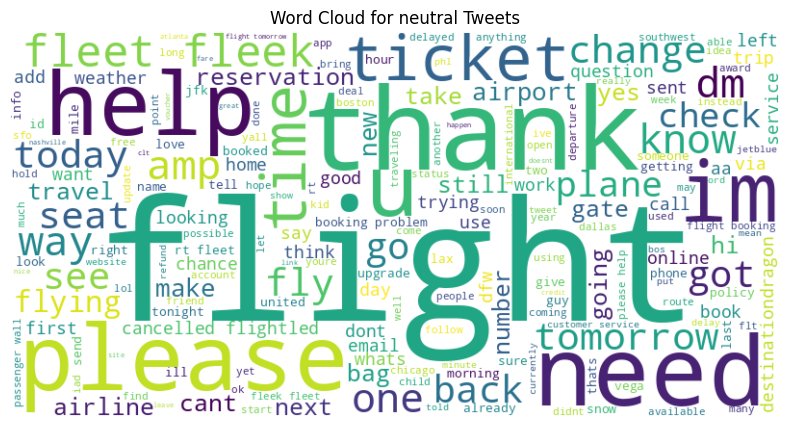

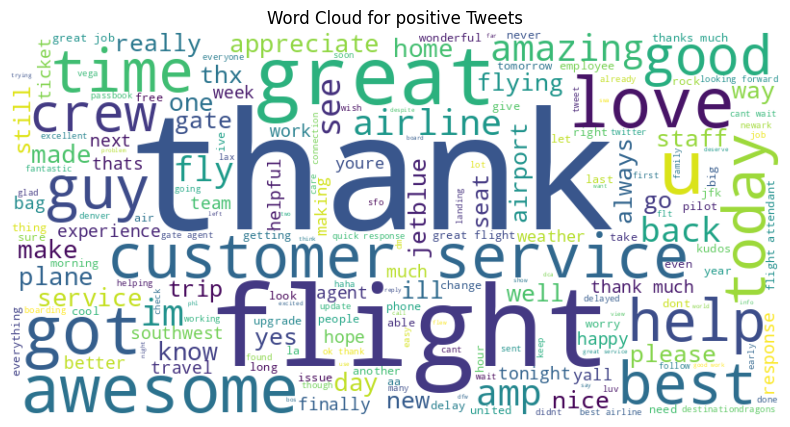

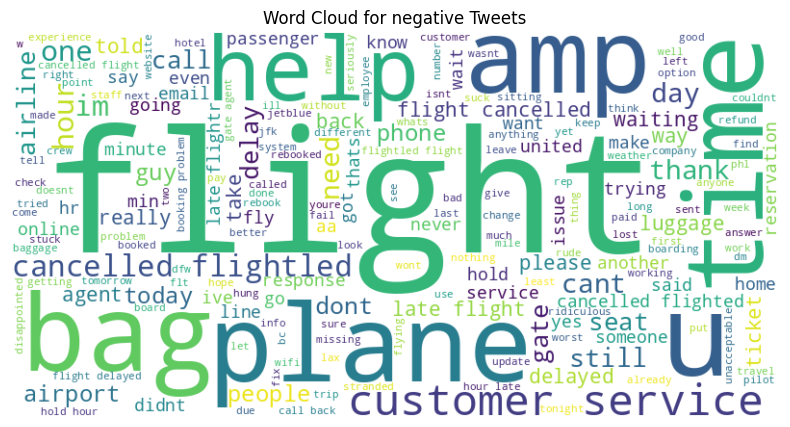

In [ ]:
# WordCloud by sentiment
for sentiment in df['airline_sentiment'].unique():
    text = " ".join(df[df['airline_sentiment'] == sentiment]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment} Tweets')
    plt.show()


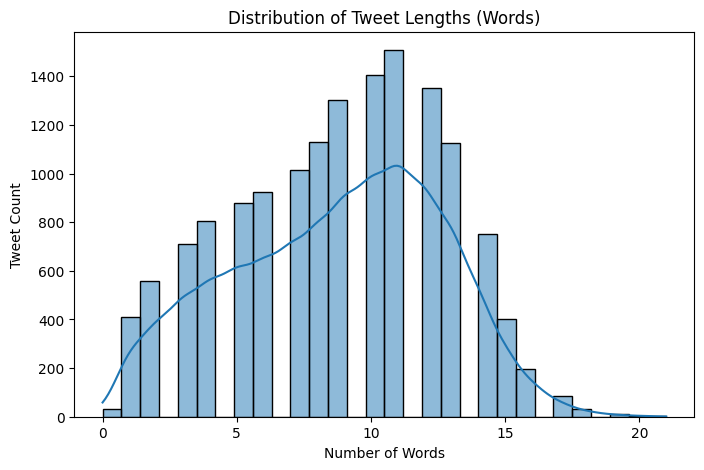

In [ ]:
# Calculate tweet length
df['text_len'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(df['text_len'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Tweet Count')
plt.show()


<ipython-input-9-ef7de91d2bcc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette='cool')


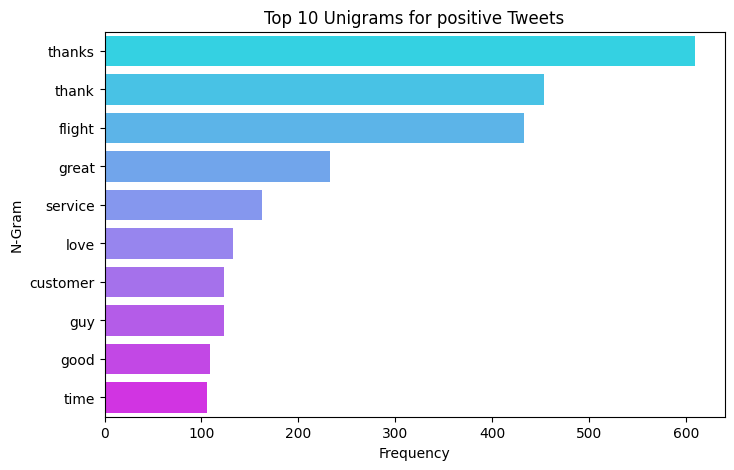

<ipython-input-9-ef7de91d2bcc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette='cool')


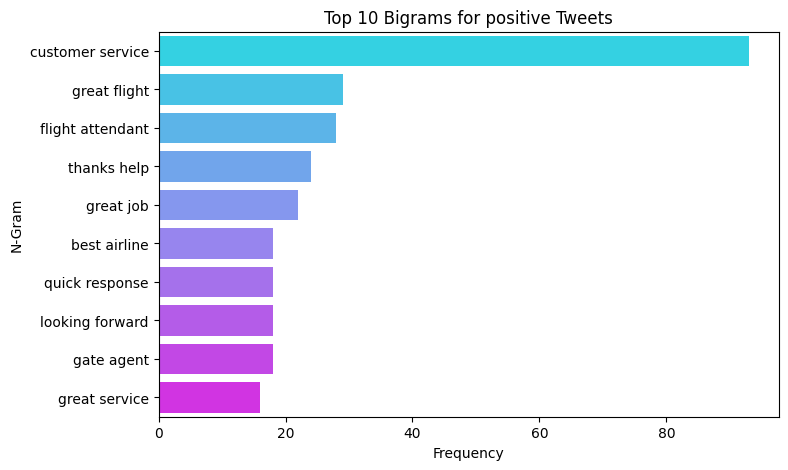

In [ ]:
def plot_ngrams(sentiment, ngram_range=(1,1), top_n=10):
    text = df[df['airline_sentiment'] == sentiment]['clean_text']
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    x, y = zip(*words_freq)
    plt.figure(figsize=(8,5))
    sns.barplot(x=y, y=x, palette='cool')
    plt.title(f'Top {top_n} {"Bi" if ngram_range==(2,2) else "Uni"}grams for {sentiment} Tweets')
    plt.xlabel('Frequency')
    plt.ylabel('N-Gram')
    plt.show()

# Example: Top unigrams and bigrams for positive tweets
plot_ngrams('positive', ngram_range=(1,1))
plot_ngrams('positive', ngram_range=(2,2))


In [ ]:
#Ans3)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_text']).toarray()

# Encode sentiment labels (e.g., positive=2, neutral=1, negative=0)
le = LabelEncoder()
y = le.fit_transform(df['airline_sentiment'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [20,25 ],
    'max_depth': [None, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_macro')
grid_rf.fit(X_train, y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best RF F1 Score:", grid_rf.best_score_)


Best RF Params: {'max_depth': None, 'n_estimators': 25}
Best RF F1 Score: 0.6625279737922749


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
nb_params = {
    'alpha': [0.1, 0.5, 1.0]
}

# Grid search with 5-fold cross-validation
grid_nb = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='f1_macro')
grid_nb.fit(X_train, y_train)

# Best model and prediction
print("Best NB Params:", grid_nb.best_params_)
print("Best NB F1 Score:", grid_nb.best_score_)

# Predict on test set with best model
nb_best_model = grid_nb.best_estimator_
nb_preds = nb_best_model.predict(X_test)


Best NB Params: {'alpha': 0.1}
Best NB F1 Score: 0.6318285916737039


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'max_depth': [3, 5],
    'n_estimators': [20,50]
}

grid_xgb = GridSearchCV(XGBClassifier(eval_metric='mlogloss'),
                        xgb_params, cv=5, scoring='f1_macro')

# Now using X_train since that's your actual variable
grid_xgb.fit(X_train, y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best XGB F1 Score:", grid_xgb.best_score_)


Best XGB Params: {'max_depth': 5, 'n_estimators': 50}
Best XGB F1 Score: 0.5777994117268521


In [ ]:
from sklearn.metrics import classification_report

# Naive Bayes (no tuning)
print("Naive Bayes:\n", classification_report(y_test, nb_preds))

# XGBoost (use tuned model)
xgb_best_model = grid_xgb.best_estimator_
xgb_best_preds = xgb_best_model.predict(X_test)
print("XGBoost (Tuned):\n", classification_report(y_test, xgb_best_preds))

# Random Forest (use tuned model)
rf_best_model = grid_rf.best_estimator_
rf_best_preds = rf_best_model.predict(X_test)
print("Random Forest (Tuned):\n", classification_report(y_test, rf_best_preds))


Naive Bayes:
               precision    recall  f1-score   support

           0       0.78      0.95      0.86      1889
           1       0.63      0.37      0.47       580
           2       0.80      0.53      0.64       459

    accuracy                           0.77      2928
   macro avg       0.74      0.62      0.66      2928
weighted avg       0.76      0.77      0.75      2928

XGBoost (Tuned):
               precision    recall  f1-score   support

           0       0.74      0.96      0.84      1889
           1       0.70      0.15      0.24       580
           2       0.74      0.57      0.65       459

    accuracy                           0.74      2928
   macro avg       0.73      0.56      0.58      2928
weighted avg       0.73      0.74      0.69      2928

Random Forest (Tuned):
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      1889
           1       0.62      0.44      0.51       580
           2       

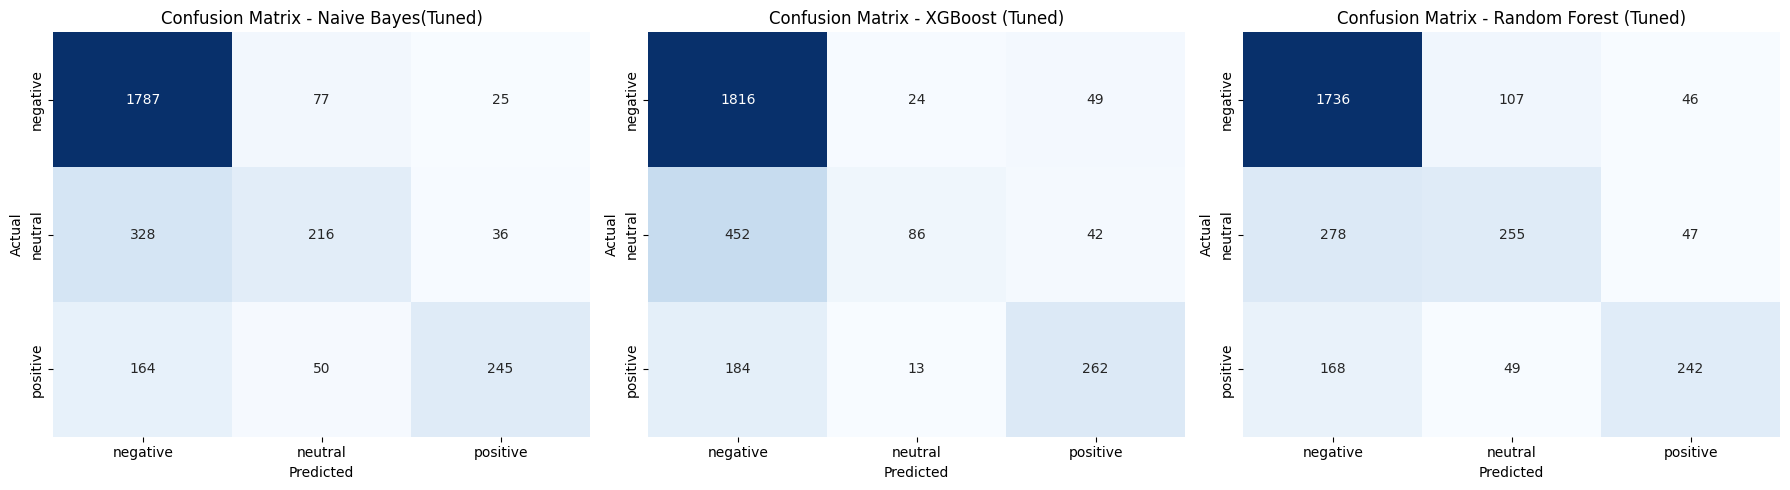

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create figure with 3 subplots horizontally
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Titles for each model
titles = ['Naive Bayes(Tuned)', 'XGBoost (Tuned)', 'Random Forest (Tuned)']
predictions = [nb_preds, xgb_best_preds, rf_best_preds]

# Loop through each model and plot its confusion matrix
for ax, preds, title in zip(axes, predictions, titles):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=le.classes_, yticklabels=le.classes_, ax=ax)
    ax.set_title(f'Confusion Matrix - {title}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [30]:
# Write your code here
import pandas as pd

def load_txt_data(file_path):
    labels = []
    texts = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if line:
                label = int(line[0])  # First character is label
                text = line[2:]       # Everything after first space
                labels.append(label)
                texts.append(text)

    return pd.DataFrame({'label': labels, 'text': texts})

# Load train and test data
train_df = load_txt_data("stsa-train.txt")
test_df = load_txt_data("stsa-test.txt")

print(train_df.head())


   label                                               text
0      1  a stirring , funny and finally transporting re...
1      0  apparently reassembled from the cutting-room f...
2      0  they presume their audience wo n't sit still f...
3      1  this is a visually stunning rumination on love...
4      1  jonathan parker 's bartleby should have been t...


Train Size: (6920, 3)
Test Size: (1821, 3)
label     0
text      0
length    0
dtype: int64


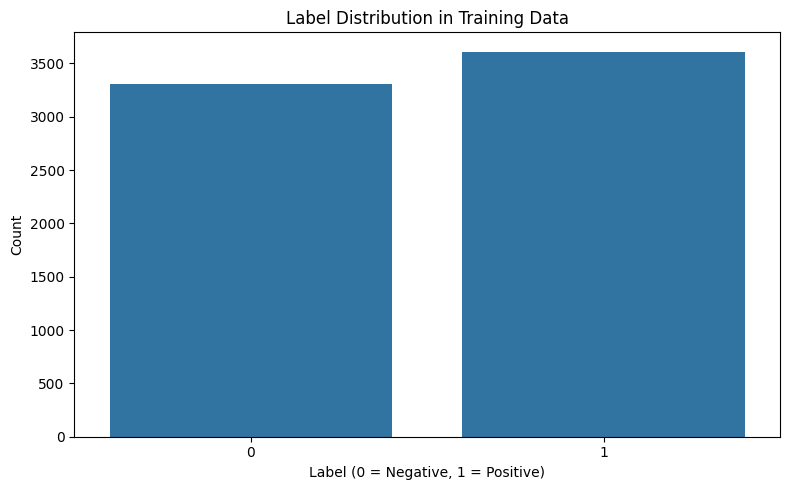

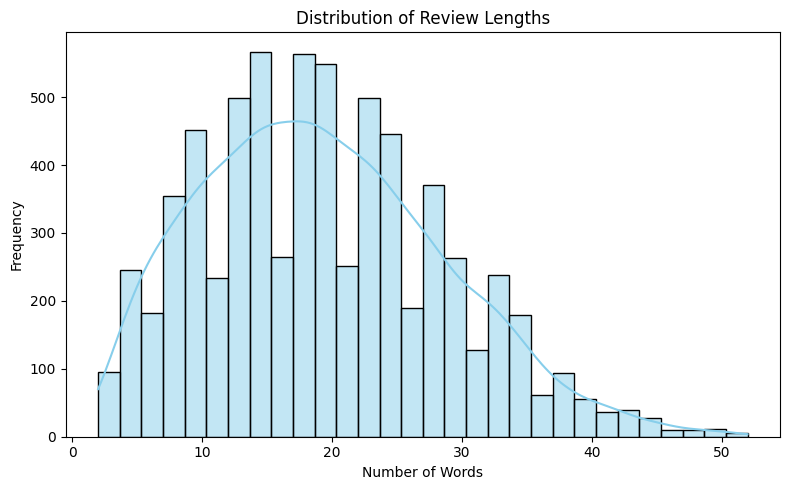

In [39]:
# Ans1) EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Check dataset size
print("Train Size:", train_df.shape)
print("Test Size:", test_df.shape)

# Check for null values
print(train_df.isnull().sum())

# Label distribution
plt.figure(figsize=(8, 5))  # Start a new figure
sns.countplot(data=train_df, x='label')
plt.title("Label Distribution in Training Data")
plt.xlabel("Label (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('label_distribution.png')  # Save the plot
plt.show()
plt.close()  # Close the figure
print()
# Review lengths
train_df['length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))  # Start a new figure
sns.histplot(train_df['length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('review_lengths.png')  # Save the plot
plt.show()
plt.close()  # Close the figure

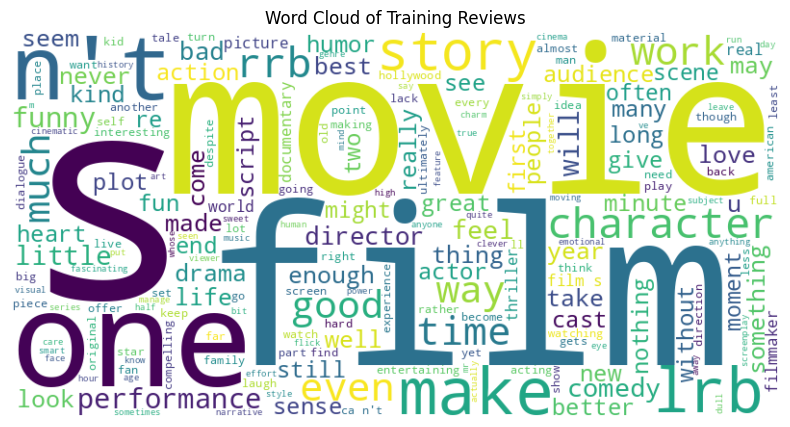

In [ ]:
from wordcloud import WordCloud

text = ' '.join(train_df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Training Reviews")
plt.show()


Test Set Size: (1821, 3)
Missing values in test set:
 label     0
text      0
length    0
dtype: int64


<ipython-input-33-9139fff9a4a4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test_df, x='label', palette='Set2')


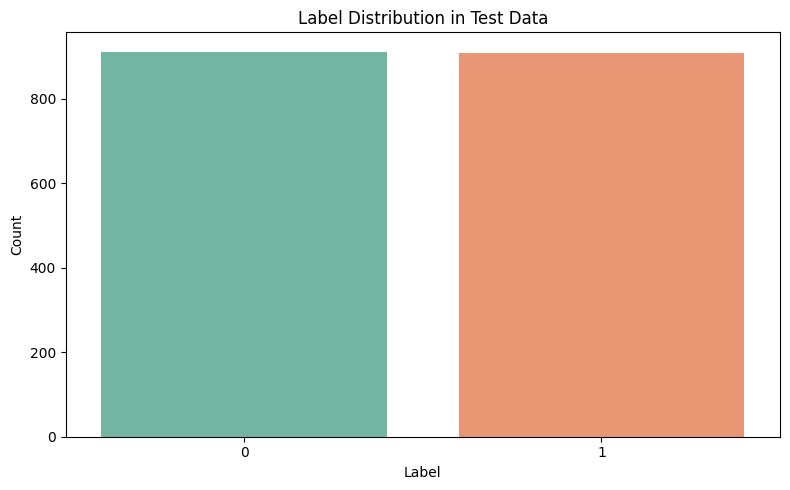

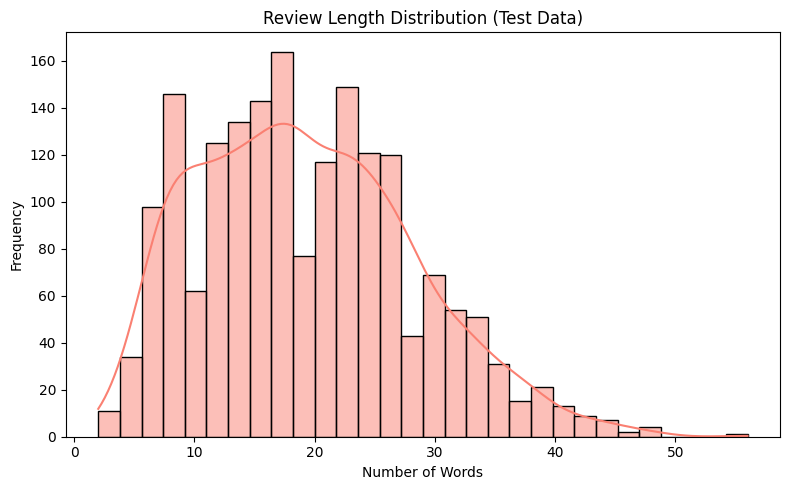

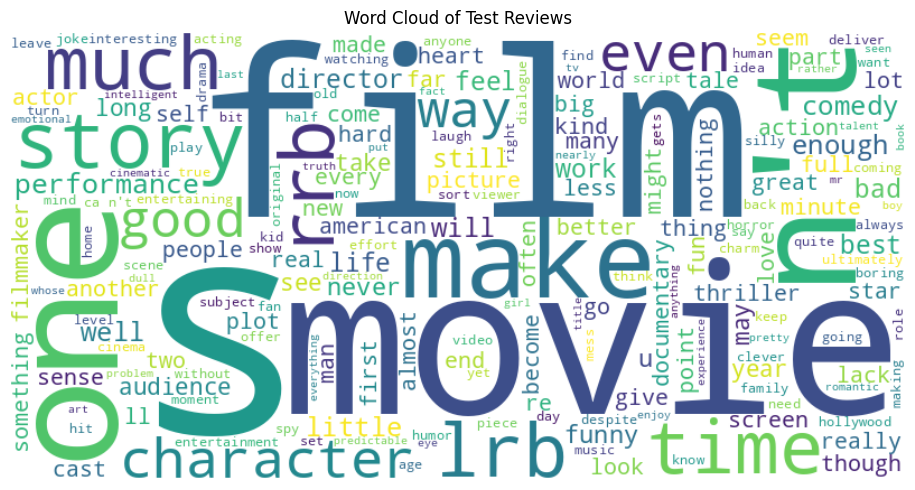

In [33]:
# Dataset size
print("Test Set Size:", test_df.shape)

# Null values check
print("Missing values in test set:\n", test_df.isnull().sum())

# Label distribution (0 = Negative, 1 = Positive)
plt.figure(figsize=(8, 5))
sns.countplot(data=test_df, x='label', palette='Set2')
plt.title("Label Distribution in Test Data")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('test_label_distribution.png')
plt.show()
plt.close()

# Review length analysis
test_df['length'] = test_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 5))
sns.histplot(test_df['length'], bins=30, kde=True, color='salmon')
print()
plt.title("Review Length Distribution (Test Data)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('test_review_lengths.png')
plt.show()
print()

# Word Cloud for test data
from wordcloud import WordCloud

text_test = ' '.join(test_df['text'])
wordcloud_test = WordCloud(width=800, height=400, background_color='white').generate(text_test)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_test, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Test Reviews")
plt.tight_layout()
plt.savefig('test_wordcloud.png')
plt.show()
plt.close()


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
def load_data(file):
    with open(file, 'r', encoding='utf-8') as f:
        texts, labels = zip(*[(line[2:], int(line[0])) for line in f if line.strip()])
    return pd.DataFrame({'text': texts, 'label': labels})

train_df = load_data("stsa-train.txt")
test_df = load_data("stsa-test.txt")

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['text'])
X_test = tfidf.transform(test_df['text'])
y_train = train_df['label']
y_test = test_df['label']

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Model
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')

# 10-fold CV
print("KNN 10-Fold CV:")
y_pred = cross_val_predict(knn, X_train, y_train, cv=10)
print(classification_report(y_train, y_pred))

# Test evaluation
knn.fit(X_train, y_train)
print("\nKNN Test Evaluation:")
print(classification_report(y_test, knn.predict(X_test)))

KNN 10-Fold CV:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3310
           1       0.74      0.72      0.73      3610

    accuracy                           0.72      6920
   macro avg       0.72      0.72      0.72      6920
weighted avg       0.72      0.72      0.72      6920


KNN Test Evaluation:
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       912
           1       0.72      0.74      0.73       909

    accuracy                           0.72      1821
   macro avg       0.72      0.72      0.72      1821
weighted avg       0.72      0.72      0.72      1821



In [43]:
from sklearn.tree import DecisionTreeClassifier

# Model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)

# 10-fold CV
print("\nDecision Tree 10-Fold CV:")
y_pred = cross_val_predict(dt, X_train, y_train, cv=10)
print(classification_report(y_train, y_pred))

# Test evaluation
dt.fit(X_train, y_train)
print("\nDecision Tree Test Evaluation:")
print(classification_report(y_test, dt.predict(X_test)))


Decision Tree 10-Fold CV:
              precision    recall  f1-score   support

           0       0.55      0.42      0.48      3310
           1       0.56      0.69      0.62      3610

    accuracy                           0.56      6920
   macro avg       0.56      0.55      0.55      6920
weighted avg       0.56      0.56      0.55      6920


Decision Tree Test Evaluation:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       912
           1       0.63      0.47      0.54       909

    accuracy                           0.59      1821
   macro avg       0.60      0.59      0.59      1821
weighted avg       0.60      0.59      0.59      1821



In [44]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 10-fold CV
print("\nRandom Forest 10-Fold CV:")
y_pred = cross_val_predict(rf, X_train, y_train, cv=10)
print(classification_report(y_train, y_pred))

# Test evaluation
rf.fit(X_train, y_train)
print("\nRandom Forest Test Evaluation:")
print(classification_report(y_test, rf.predict(X_test)))


Random Forest 10-Fold CV:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69      3310
           1       0.71      0.75      0.73      3610

    accuracy                           0.71      6920
   macro avg       0.71      0.71      0.71      6920
weighted avg       0.71      0.71      0.71      6920


Random Forest Test Evaluation:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       912
           1       0.72      0.76      0.74       909

    accuracy                           0.73      1821
   macro avg       0.73      0.73      0.73      1821
weighted avg       0.73      0.73      0.73      1821



In [45]:
import xgboost as xgb

# Model
xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    max_depth=6,
    random_state=42
)

# 10-fold CV
print("\nXGBoost 10-Fold CV:")
y_pred = cross_val_predict(xgb_model, X_train, y_train, cv=10)
print(classification_report(y_train, y_pred))

# Test evaluation
xgb_model.fit(X_train, y_train)
print("\nXGBoost Test Evaluation:")
print(classification_report(y_test, xgb_model.predict(X_test)))


XGBoost 10-Fold CV:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68      3310
           1       0.70      0.78      0.74      3610

    accuracy                           0.72      6920
   macro avg       0.72      0.71      0.71      6920
weighted avg       0.72      0.72      0.71      6920


XGBoost Test Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       912
           1       0.70      0.80      0.74       909

    accuracy                           0.72      1821
   macro avg       0.73      0.72      0.72      1821
weighted avg       0.73      0.72      0.72      1821



## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

Data shape: (413840, 6)

Missing values:
Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

After dropping NAs: (413770, 6)


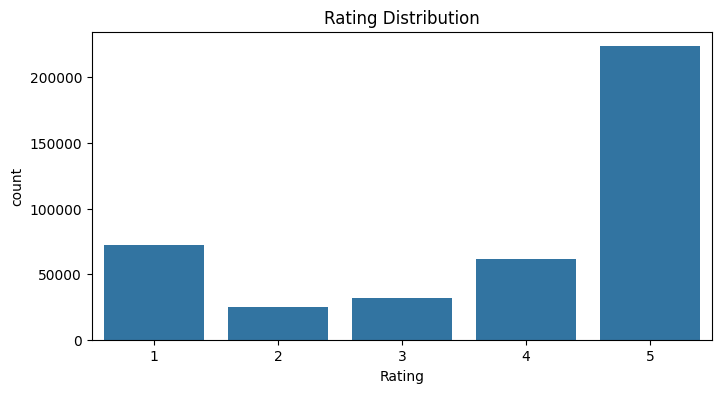

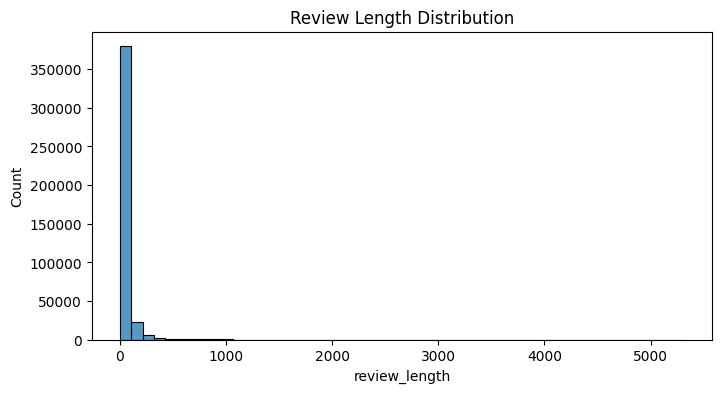

In [46]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")
print(f"Data shape: {df.shape}")
print("\nMissing values:")
print(df.isna().sum())

# Drop missing values
df = df.dropna(subset=['Reviews'])
print("\nAfter dropping NAs:", df.shape)

# Rating distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Rating')
plt.title("Rating Distribution")
plt.show()
print()
# Review length analysis
df['review_length'] = df['Reviews'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,4))
sns.histplot(df['review_length'], bins=50)
plt.title("Review Length Distribution")
plt.show()

In [ ]:
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   review_length  
0             72  
1             40  
2              2  
3             17  
4             43

In [ ]:
# Load data with relevant columns only
df = pd.read_csv("Amazon_Unlocked_Mobile.csv", usecols=['Reviews', 'Rating'])

# 1. First-Level Cleaning (Structural)
print(f"Original: {len(df)} reviews")
df = df.dropna(subset=['Reviews'])  # Drop NA reviews first
df = df[df['Reviews'].str.strip().ne('')]  # Remove empty strings
print(f"After NA/empty removal: {len(df)} reviews")

Original: 413840 reviews
After NA/empty removal: 413770 reviews


In [ ]:
# 2. Deduplication (critical for clustering)
df = df.drop_duplicates(subset=['Reviews'], keep='first')
print(f"After deduplication: {len(df)} reviews")

After deduplication: 162490 reviews


In [ ]:
!pip install swifter  # Install first (only once)

import swifter

In [ ]:
import re
from nltk.corpus import stopwords
import pandas as pd

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Enhanced cleaning function
def clean_text(text):
    # Remove URLs, HTML tags, and special chars (keep basic punctuation)
    text = re.sub(r'https?://\S+|www\.\S+|<.*?>', '', str(text))
    text = re.sub(r'[^\w\s.,!?]', '', text.lower())
    # Handle repeated chars (e.g., "loooove" -> "love")
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    # Remove stopwords and short words
    return ' '.join([word for word in text.split()
                   if word not in stop_words and len(word) > 2])

# Apply cleaning
df['cleaned_reviews'] = df['Reviews'].swifter.apply(clean_text)  # Requires tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patial31/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pandas Apply:   0%|          | 0/162490 [00:00<?, ?it/s]

In [ ]:
df.head()

Rating                                            Reviews  \
0       5  I feel so LUCKY to have found this used (phone...   
1       4  nice phone, nice up grade from my pantach revu...   
2       5                                       Very pleased   
3       4  It works good but it goes slow sometimes but i...   
4       4  Great phone to replace my lost phone. The only...   

                                     cleaned_reviews  
0  feel lucky found used phone used hard all, pho...  
1  nice phone, nice grade pantach revue. clean se...  
2                                            pleased  
3     works good goes slow sometimes good phone love  
4  great phone replace lost phone. thing volume b...

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['cleaned_reviews'].values)
tfidf.shape

(162490, 84293)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(tfidf)

In [47]:
df.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5  I feel so LUCKY to have found this used (phone...           1.0   
1       4  nice phone, nice up grade from my pantach revu...           0.0   
2       5                                       Very pleased           0.0   
3       4  It works good but it goes slow sometimes but i...           0.0   
4       4  Great phone to replace my lost phone. The only...           0.0   

   review_length  
0             72  
1             40  
2              2  
3             17  
4             43

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
df['dbscan_cluster'] = dbscan.fit_predict(tfidf)

In [ ]:
# Sample 5000 rows for hierarchical clustering
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import AgglomerativeClustering


df_sample = df.sample(n=5000, random_state=42)

# Vectorize again (or use previously computed cleaned reviews)
tfidf_sample = tfidf_vect.transform(df_sample['cleaned_reviews'])

# Dimensionality reduction
svd = TruncatedSVD(n_components=100, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_sample)

# Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df_sample['hierarchical_cluster'] = agg_clustering.fit_predict(tfidf_reduced)

df_sample.head()


Rating                                            Reviews  \
160607       4  Same features as my wife's iPhone 6.at a third...   
378775       3  This phone is good but some of the apps aren't...   
247165       5  Love this phone! bought the same model to repl...   
253651       5                     Shipped very fast, great phone   
189055       4   Nice product, arrived on time , would recommend!   

                                          cleaned_reviews  kmeans_cluster  \
160607             features wifes iphone 6.at third cost.               4   
378775  phone good apps arent par. phone dont current ...               4   
247165  love phone! bought model replace old one. love...               2   
253651                          shipped fast, great phone               1   
189055        nice product, arrived time would recommend!               4   

        dbscan_cluster  hierarchical_cluster  
160607              -1                     0  
378775              -1                     0  
247165               0                     0  
253651               0                     1  
189055               0                     0

In [ ]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import numpy as np

# 1. Tokenize cleaned reviews (ensure output is list of lists)
tokenized = [str(text).split() for text in df['cleaned_reviews']]  # Force string conversion

# 2. Train Word2Vec model (with explicit parameter names)
w2v_model = Word2Vec(
    sentences=tokenized,
    vector_size=100,    # Embedding dimension
    window=5,          # Context window size
    min_count=5,       # Ignores rare words (<5 occurrences)
    workers=4,         # Parallel processing
    epochs=10          # Number of training iterations
)

# 3. Create document vectors (avoid pandas apply)
def get_doc_vector(words):
    vectors = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(w2v_model.vector_size)

# 4. Vectorize all documents using list comprehension
doc_vectors = [get_doc_vector(doc) for doc in tokenized]
X_w2v = np.array(doc_vectors)  # Convert to numpy array

# 5. Cluster using K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['w2v_cluster'] = kmeans.fit_predict(X_w2v)

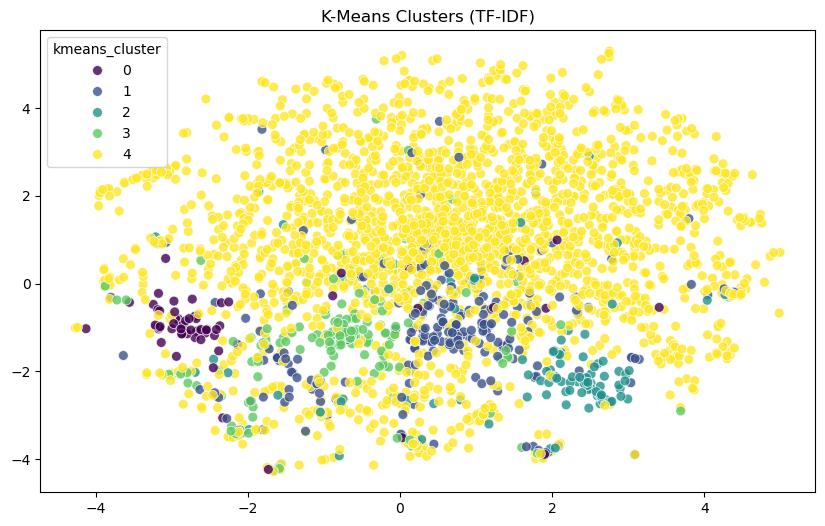

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

# 1. Convert sparse matrix to dense (for the sample only)
sample_idx = np.random.choice(len(df), size=3000, replace=False)
tfidf_dense = tfidf[sample_idx].toarray()  # Critical fix

# 2. Run t-SNE with random initialization
tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    init='random'  # Required for sparse inputs
)
kmeans_tsne = tsne.fit_transform(tfidf_dense)

# 3. Plot
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=kmeans_tsne[:,0], y=kmeans_tsne[:,1],
    hue=df['kmeans_cluster'].iloc[sample_idx],
    palette='viridis',
    alpha=0.8,
    s=50
)
plt.title("K-Means Clusters (TF-IDF)")
plt.show()

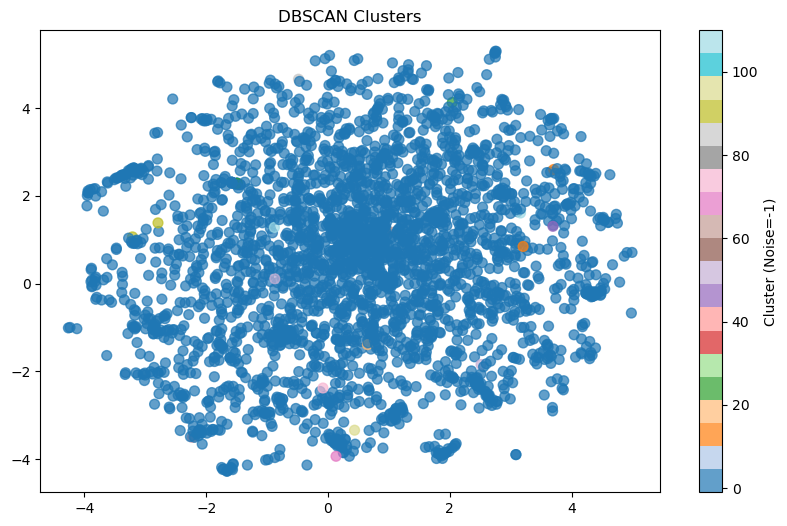

In [ ]:
# Use same dense sample
dbscan_tsne = tsne.fit_transform(tfidf_dense)

plt.figure(figsize=(10,6))
plt.scatter(
    dbscan_tsne[:,0], dbscan_tsne[:,1],
    c=df['dbscan_cluster'].iloc[sample_idx],
    cmap='tab20',
    alpha=0.7,
    s=50
)
plt.colorbar(label='Cluster (Noise=-1)')
plt.title("DBSCAN Clusters")
plt.show()

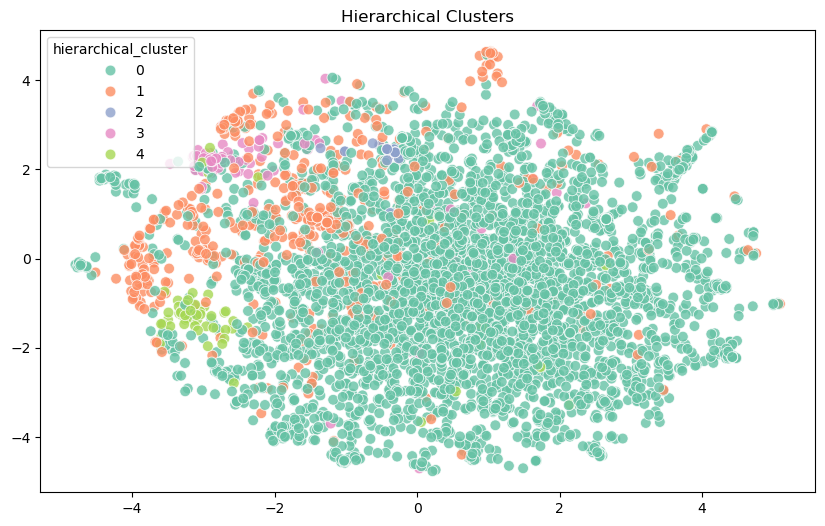

In [ ]:
# Convert your pre-sampled hierarchical data to dense
hier_dense = tfidf_sample.toarray()  # From your earlier code
hier_tsne = TSNE(init='random').fit_transform(hier_dense)

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=hier_tsne[:,0], y=hier_tsne[:,1],
    hue=df_sample['hierarchical_cluster'],
    palette='Set2',
    alpha=0.8,
    s=60
)
plt.title("Hierarchical Clusters")
plt.show()

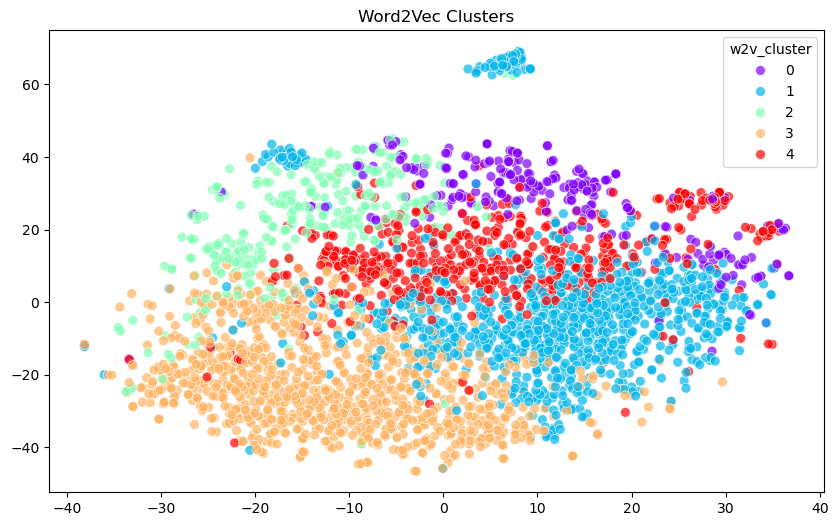

In [ ]:
# Word2Vec vectors are already dense
w2v_tsne = TSNE(init='random').fit_transform(X_w2v[sample_idx])

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=w2v_tsne[:,0], y=w2v_tsne[:,1],
    hue=df['w2v_cluster'].iloc[sample_idx],
    palette='rainbow',
    alpha=0.7,
    s=50
)
plt.title("Word2Vec Clusters")
plt.show()

**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

'''The clustering results of Amazon review data using K-means, DBSCAN, Hierarchical clustering, and
Word2Vec reveal distinct differences in their ability to group reviews based on TF-IDF and Word2Vec features.
K-means clustering with TF-IDF features produced five clusters but struggled with significant overlap, particularly between
clusters 0, 1, and 2, indicating limited separation in the high-dimensional TF-IDF space. DBSCAN, also using TF-IDF, identified one
dominant cluster (cluster 0) while labeling many points as noise (cluster -1), suggesting that density-based clustering may not be
well-suited for this feature set due to the lack of clear density variations. Hierarchical clustering with TF-IDF performed better than
K-means, showing more structured and evenly distributed clusters with reduced overlap, likely benefiting from its ability to capture
nested relationships in the data. In contrast, Word2Vec clustering, which leverages semantic embeddings, demonstrated the best
separation among clusters, with clearer boundaries and less overlap, highlighting its superior ability to capture meaningful
semantic patterns in the review text compared to TF-IDF-based methods. Overall, Word2Vec clustering outperformed the TF-IDF-based
approaches, while Hierarchical clustering provided a more balanced result than K-means and DBSCAN in this context.'''


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

